In [15]:

# !pip install fredapi -q
# !pip install plotly -q
# !pip install opendatasets --upgrade -q
# !pip install -U scikit-learn -q
# !pip install scipy -q
# !pip install joblib --upgrade-q
# !pip install wordcloud -q


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --upgrade-q


In [16]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
from fredapi import Fred
import plotly.express as px
import joblib
from wordcloud import WordCloud



In [66]:
import secret

https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data

In [18]:
dbg = True

In [28]:
#ONLY NEED TO RUN THIS ONCE
data_url='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(data_url, force=True)

#note use username and key in slack chat

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  matthewkolotylo


Your Kaggle Key:

  ········


100%|██████████| 653M/653M [00:08<00:00, 77.5MB/s] 


In [20]:
#mac version
import os
data_dir = r'./us-accidents'
os.listdir(data_dir)


[]

In [ ]:
#windows version
# import os
# data_dir = r'./us-accidents'
# os.listdir(data_dir)

In [27]:

data_filename=data_dir+'/US_Accidents_March23.csv'

In [29]:
if dbg:
    car_crash_df=pd.read_csv(data_filename, nrows=200000)
else:
    car_crash_df=pd.read_csv(data_filename)


# Data Understanding

In [30]:
#pd.set_option('display.max_columns', None)
car_crash_df.head(5)

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [31]:
car_crash_df.tail(5)

ID   Source  Severity           Start_Time             End_Time  \
199995  A-200002  Source2         2  2017-01-12 06:12:42  2017-01-12 06:56:35   
199996  A-200003  Source2         3  2017-01-12 06:15:23  2017-01-12 06:45:04   
199997  A-200004  Source2         2  2017-01-12 06:12:02  2017-01-12 06:41:39   
199998  A-200005  Source2         2  2017-01-12 06:09:29  2017-01-12 06:39:11   
199999  A-200006  Source2         2  2017-01-12 06:08:14  2017-01-12 06:38:05   

        Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
199995  40.698299 -74.185783      NaN      NaN          0.01  ...      False   
199996  40.667114 -73.995918      NaN      NaN          0.01  ...      False   
199997  40.801270 -73.929916      NaN      NaN          0.01  ...      False   
199998  40.700081 -73.323242      NaN      NaN          0.01  ...      False   
199999  42.516994 -71.142113      NaN      NaN          0.00  ...      False   

       Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
199995   False  False           False          False        False   
199996   False  False           False          False        False   
199997   False  False           False          False        False   
199998   False  False           False          False        False   
199999   False  False           False          False        False   

       Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
199995          Night          Night             Night                   Day  
199996          Night          Night               Day                   Day  
199997          Night          Night             Night                   Day  
199998          Night          Night             Night                   Day  
199999          Night          Night               Day                   Day  

[5 rows x 46 columns]

In [32]:
car_crash_df.shape

(200000, 46)

In [48]:
car_crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199969 entries, 0 to 199968
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype    
---  ------             --------------   -----    
 0   Severity           199969 non-null  int64    
 1   Start_Time         199969 non-null  object   
 2   End_Time           199969 non-null  object   
 3   Start_Lat          199969 non-null  float64  
 4   Start_Lng          199969 non-null  float64  
 5   Distance(mi)       199969 non-null  float64  
 6   Description        199969 non-null  object   
 7   Street             199969 non-null  object   
 8   City               199955 non-null  object   
 9   County             199969 non-null  object   
 10  State              199969 non-null  object   
 11  Zipcode            199939 non-null  object   
 12  Country            199969 non-null  object   
 13  Temperature(F)     197134 non-null  float64  
 14  Humidity(%)        196726 non-null  float64  
 15  Pressure(in)     

In [49]:
car_crash_df.describe()

Severity      Start_Lat      Start_Lng   Distance(mi)  \
count  199969.000000  199969.000000  199969.000000  199969.000000   
mean        2.410059      35.402954    -104.357471       0.033970   
std         0.494724       4.582636      17.870354       0.535492   
min         1.000000      25.433098    -123.813927       0.000000   
25%         2.000000      33.754379    -118.437279       0.000000   
50%         2.000000      34.120522    -117.370895       0.000000   
75%         3.000000      38.515106     -83.764374       0.010000   
max         4.000000      44.895218     -70.590034      80.890000   

       Temperature(F)    Humidity(%)   Pressure(in)  Visibility(mi)  \
count   197134.000000  196726.000000  197766.000000   196706.000000   
mean        65.687450      63.903134      30.001038        9.281520   
std         16.437962      21.603049       0.271977        1.991366   
min        -13.000000       4.000000       0.120000        0.000000   
25%         57.000000      50.000000      29.910000       10.000000   
50%         66.900000      66.000000      30.000000       10.000000   
75%         77.000000      81.000000      30.100000       10.000000   
max        132.600000     100.000000      33.040000       80.000000   

       Wind_Speed(mph)  
count    161537.000000  
mean          8.511925  
std           6.313500  
min           0.000000  
25%           5.000000  
50%           8.100000  
75%          10.400000  
max         822.800000

In [50]:
car_crash_df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Bump', 'Crossing', 'Roundabout', 'Traffic_Signal',
       'Sunrise_Sunset', 'Year-Month'],
      dtype='object')

In [51]:
car_crash_df.dtypes

Severity                 int64
Start_Time              object
End_Time                object
Start_Lat              float64
Start_Lng              float64
Distance(mi)           float64
Description             object
Street                  object
City                    object
County                  object
State                   object
Zipcode                 object
Country                 object
Temperature(F)         float64
Humidity(%)            float64
Pressure(in)           float64
Visibility(mi)         float64
Wind_Direction          object
Wind_Speed(mph)        float64
Weather_Condition       object
Bump                      bool
Crossing                  bool
Roundabout                bool
Traffic_Signal            bool
Sunrise_Sunset          object
Year-Month           period[M]
dtype: object

# Data Cleaning

In [52]:
missing_percentage = car_crash_df.isna().mean() * 100
missing_percentage

Severity              0.000000
Start_Time            0.000000
End_Time              0.000000
Start_Lat             0.000000
Start_Lng             0.000000
Distance(mi)          0.000000
Description           0.000000
Street                0.000000
City                  0.007001
County                0.000000
State                 0.000000
Zipcode               0.015002
Country               0.000000
Temperature(F)        1.417720
Humidity(%)           1.621751
Pressure(in)          1.101671
Visibility(mi)        1.631753
Wind_Direction        0.778121
Wind_Speed(mph)      19.218979
Weather_Condition     1.394216
Bump                  0.000000
Crossing              0.000000
Roundabout            0.000000
Traffic_Signal        0.000000
Sunrise_Sunset        0.007001
Year-Month            0.000000
dtype: float64

In [58]:
#dropping columns with more than 20% missing values
car_crash_df=car_crash_df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'])


KeyError: "['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'] not found in axis"

In [54]:
#Dropping columns not relevant to the analysis
car_crash_df=car_crash_df.drop(columns=['ID','Source','Airport_Code','Weather_Timestamp','Amenity','Give_Way','Junction','No_Exit','Railway','Station','Stop','Traffic_Calming','Turning_Loop','Timezone','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])  



KeyError: "['ID', 'Source', 'Airport_Code', 'Weather_Timestamp', 'Amenity', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Turning_Loop', 'Timezone', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'] not found in axis"

In [59]:
car_crash_df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Bump', 'Crossing', 'Roundabout', 'Traffic_Signal',
       'Sunrise_Sunset', 'Year-Month'],
      dtype='object')

In [71]:
car_crash_df.drop_duplicates(inplace=True)

In [72]:
#adding a Year-Month Column for easier joins
car_crash_df['Year-Month'] = pd.to_datetime(car_crash_df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.to_period('M')


In [73]:
print(car_crash_df['Year-Month'].isna().sum())
#dropping rows with missing Year-Month, will help notebook performance
car_crash_df= car_crash_df.dropna(subset=['Year-Month'])


0


In [74]:
#fixing index due to the rows we dropped
car_crash_df.reset_index(drop=True, inplace=True)

In [75]:
car_crash_df.shape

(199969, 26)

# Fred Api
## Gathering Population, Household Income (State and County level), and Unemployment DataFrames!

In [76]:
#using our super secret key to acess fred api
fred = Fred(api_key=secret.fred_key)

### Population Data Gathering


In [77]:
# pop_search= fred.search('Resident Population')
# pop_search_filtered = pop_search[pop_search['id'].str.len() <= 5] #states all had an id of 5 characters or less
# pop_search_filtered.head(3)


In [78]:
# #putting 52 df's into a list and then forming population_df
# all_results=[]

# for myid in pop_search_filtered.index:
#     result=fred.get_series(myid) #get series is how we get data in fred Api
#     result=result.to_frame(name=myid)
#     all_results.append(result)
#     population_df=pd.concat(all_results, axis=1)

In [79]:
# #fixing column headings
# population_headings=pop_search_filtered['title'].to_dict()
# population_df.rename(columns=population_headings, inplace=True)

In [80]:

# Check if the cached file exists
try:
    population_df = joblib.load('cached_population_dataframe.joblib')
except FileNotFoundError:
  

    pop_search = fred.search('Resident Population')
    pop_search_filtered = pop_search[pop_search['id'].str.len() <= 5]

    all_results = []
    for myid in pop_search_filtered.index:
        result = fred.get_series(myid)
        result = result.to_frame(name=myid)
        all_results.append(result)
    population_df = pd.concat(all_results, axis=1)

    # Fixing column headings
    population_headings = pop_search_filtered['title'].to_dict()
    population_df.rename(columns=population_headings, inplace=True)

    # Save the DataFrame to a file
    joblib.dump(population_df, 'cached_population_dataframe.joblib')


population_df.head(3)


Resident Population in California  Resident Population in Florida  \
1900-01-01                             1490.0                           530.0   
1901-01-01                             1550.0                           544.0   
1902-01-01                             1623.0                           565.0   

            Resident Population in Texas  Resident Population in New York  \
1900-01-01                        3055.0                           7283.0   
1901-01-01                        3132.0                           7449.0   
1902-01-01                        3210.0                           7612.0   

            Resident Population in Alabama  Resident Population in Georgia  \
1900-01-01                          1830.0                          2220.0   
1901-01-01                          1907.0                          2263.0   
1902-01-01                          1935.0                          2305.0   

            Resident Population in Ohio  Resident Population in Washington  \
1900-01-01                       4161.0                              523.0   
1901-01-01                       4216.0                              583.0   
1902-01-01                       4322.0                              651.0   

            Resident Population in Missouri  \
1900-01-01                           3108.0   
1901-01-01                           3128.0   
1902-01-01                           3147.0   

            Resident Population in North Carolina  ...  \
1900-01-01                                 1897.0  ...   
1901-01-01                                 1926.0  ...   
1902-01-01                                 1956.0  ...   

            Resident Population in Kansas  \
1900-01-01                         1473.0   
1901-01-01                         1490.0   
1902-01-01                         1505.0   

            Resident Population in New Hampshire  Resident Population in Iowa  \
1900-01-01                                 412.0                       2231.0   
1901-01-01                                 412.0                       2227.0   
1902-01-01                                 409.0                       2222.0   

            Resident Population in New Mexico  Resident Population in Montana  \
1900-01-01                              196.0                           245.0   
1901-01-01                              206.0                           261.0   
1902-01-01                              218.0                           270.0   

            Resident Population in Nebraska  Resident Population in Maine  \
1900-01-01                           1067.0                         695.0   
1901-01-01                           1078.0                         699.0   
1902-01-01                           1089.0                         703.0   

            Resident Population in North Dakota  \
1900-01-01                                321.0   
1901-01-01                                346.0   
1902-01-01                                371.0   

            Resident Population in Federal Reserve District 1: Boston  \
1900-01-01                                                NaN           
1901-01-01                                                NaN           
1902-01-01                                                NaN           

            Resident Population in Federal Reserve District 9: Minneapolis  
1900-01-01                                                NaN               
1901-01-01                                                NaN               
1902-01-01                                                NaN               

[3 rows x 53 columns]

### Median Household Income Data Gathering

In [81]:
# #Median Household Income for each state
# socio_search=fred.search('median household income',filter=('units','Current%20Dollars')) #this is going to be for states, I will do for counties next, %20 is ascii for space
# socio_search_filtered_df = socio_search[socio_search['title'].str.contains('Median Household Income in', case=True)] # this is going to be for states, I will do for counties next


In [82]:
# med_results=[]

# for myid in socio_search_filtered_df.index:
#     result=fred.get_series(myid) #get series is how we get data in fred Api
#     result=result.to_frame(name=myid)
#     med_results.append(result)
#     states_mhhi_df=pd.concat(med_results, axis=1)

In [83]:
# title_dict = socio_search_filtered_df["title"].to_dict()
# title_dict

# states_mhhi_df.rename(columns=title_dict, inplace=True) #renaming columns to state names
# states_mhhi_df.head(3)

In [84]:
try:
    states_mhhi_df = joblib.load('cached_states_mhhi_df.joblib')
except FileNotFoundError:
    #Median Household Income for each state
    socio_search=fred.search('median household income',filter=('units','Current%20Dollars')) #this is going to be for states, I will do for counties next, %20 is ascii for space
    socio_search_filtered_df = socio_search[socio_search['title'].str.contains('Median Household Income in', case=True)] # this is going to be for states, I will do for counties next
    med_results=[]

    for myid in socio_search_filtered_df.index:
        result=fred.get_series(myid) #get series is how we get data in fred Api
        result=result.to_frame(name=myid)
        med_results.append(result)
        states_mhhi_df=pd.concat(med_results, axis=1)

    title_dict = socio_search_filtered_df["title"].to_dict()
    title_dict

    states_mhhi_df.rename(columns=title_dict, inplace=True) #renaming columns to state names
    
    # Save the DataFrame to a file
    joblib.dump(states_mhhi_df, 'cached_states_mhhi_df.joblib')
states_mhhi_df.head(3)


Median Household Income in the United States  \
1984-01-01                                       22420.0   
1985-01-01                                       23620.0   
1986-01-01                                       24900.0   

            Median Household Income in California  \
1984-01-01                                25290.0   
1985-01-01                                26980.0   
1986-01-01                                29010.0   

            Median Household Income in Massachusetts  \
1984-01-01                                   26960.0   
1985-01-01                                   28210.0   
1986-01-01                                   30340.0   

            Median Household Income in Texas  \
1984-01-01                           23020.0   
1985-01-01                           23740.0   
1986-01-01                           24160.0   

            Median Household Income in North Carolina  \
1984-01-01                                    20570.0   
1985-01-01                                    21450.0   
1986-01-01                                    21860.0   

            Median Household Income in Tennessee  \
1984-01-01                               16780.0   
1985-01-01                               17780.0   
1986-01-01                               18260.0   

            Median Household Income in Alabama  \
1984-01-01                             17310.0   
1985-01-01                             18330.0   
1986-01-01                             19130.0   

            Median Household Income in Wisconsin  \
1984-01-01                               20740.0   
1985-01-01                               23250.0   
1986-01-01                               26430.0   

            Median Household Income in New York  \
1984-01-01                              22030.0   
1985-01-01                              23640.0   
1986-01-01                              25030.0   

            Median Household Income in Connecticut  ...  \
1984-01-01                                 29950.0  ...   
1985-01-01                                 31090.0  ...   
1986-01-01                                 32720.0  ...   

            Median Household Income in Nebraska  \
1984-01-01                              21400.0   
1985-01-01                              21800.0   
1986-01-01                              21770.0   

            Median Household Income in South Dakota  \
1984-01-01                                  19410.0   
1985-01-01                                  18140.0   
1986-01-01                                  19900.0   

            Median Household Income in Mississippi  \
1984-01-01                                 15430.0   
1985-01-01                                 16410.0   
1986-01-01                                 16510.0   

            Median Household Income in Wyoming  \
1984-01-01                             23820.0   
1985-01-01                             22080.0   
1986-01-01                             23560.0   

            Median Household Income in New Mexico  \
1984-01-01                                20630.0   
1985-01-01                                20420.0   
1986-01-01                                19850.0   

            Median Household Income in District of Columbia  \
1984-01-01                                          20410.0   
1985-01-01                                          21080.0   
1986-01-01                                          24320.0   

            Median Household Income in West Virginia  \
1984-01-01                                   16840.0   
1985-01-01                                   15980.0   
1986-01-01                                   16460.0   

            Median Household Income in Delaware  \
1984-01-01                              25820.0   
1985-01-01                              22980.0   
1986-01-01                              25630.0   

            Median Household Income in Hawaii  \
1984-01-01                            28880.0   
1985-01-01  

#### Median Household Income per County

In [85]:
# countyHHI=fred.search('median household income') 
# countyHHI_filtered= countyHHI[countyHHI['title'].str.contains('Estimate of Median Household Income', case=True)]
# countyHHI_filtered.head(3)

In [86]:
#fitering out data we dont want (90% confidence interval estimate)
# bad_data=countyHHI_filtered.loc[countyHHI_filtered['title'].str.contains('90%')]
# bad_data['title'].to_dict()

In [87]:

# countyHHI_filtered.drop(bad_data.index, inplace=True)


In [88]:
#takes 43 minutes 20 seconds to run
# county_results=[]

# for myid in countyHHI_filtered.index:
#     import time

#     retries = 0
#     max_retries = 5

#     while retries < max_retries:
#         try:
#             # Make API request here
#             result = fred.get_series(myid)
#             result = result.to_frame(name=myid)
#             county_results.append(result)
#             scountyHHI_filtered_df = pd.concat(county_results, axis=1)
#             time.sleep(3)
#             break  # If successful, exit the loop
#         except RateLimitError:  # Replace with the actual exception type
#             retries += 1
#             delay = 2**retries  # Exponential backoff
#             time.sleep(delay)


In [89]:
# county_series=countyHHI_filtered.index.to_list()

# socio_title = countyHHI_filtered["title"].to_dict()

# scountyHHI_filtered_df.rename(columns=socio_title, inplace=True) #renaming columns to county names
#scounty.to_csv('your_data.csv', index=True)

In [90]:
#made it a csv file after running once previously
county_HHI_df=pd.read_csv('HHIcounty')
county_HHI_df.head(3)

Unnamed: 0  Estimate of Median Household Income for Los Angeles County, CA  \
0  1989-01-01                                            31123.0                
1  1990-01-01                                                NaN                
2  1991-01-01                                                NaN                

   Estimate of Median Household Income for San Diego County, CA  \
0                                            31627.0              
1                                                NaN              
2                                                NaN              

   Estimate of Median Household Income for San Francisco County/City, CA  \
0                                            30166.0                       
1                                                NaN                       
2                                                NaN                       

   Estimate of Median Household Income for Orange County, CA  \
0                                            39592.0           
1                                                NaN           
2                                                NaN           

   Estimate of Median Household Income for Denver County, CO  \
0                                            24845.0           
1                                                NaN           
2                                                NaN           

   Estimate of Median Household Income for Miami-Dade County, FL  \
0                                                NaN               
1                                                NaN               
2                                                NaN               

   Estimate of Median Household Income for Dallas County, TX  \
0                                            30570.0           
1                                                NaN           
2                                                NaN           

   Estimate of Median Household Income for Santa Clara County, CA  \
0                                            44316.0                
1                                                NaN                
2                                                NaN                

   Estimate of Median Household Income for Fairfax County, VA  ...  \
0                                                NaN           ...   
1                                                NaN           ...   
2                                                NaN           ...   

   Estimate of Median Household Income for Grant County, WA  \
0                                            23797.0          
1                                                NaN          
2                                                NaN          

   Estimate of Median Household Income for Hunt County, TX  \
0                                            24333.0         
1                                                NaN         
2                                                NaN         

   Estimate of Median Household Income for Clark County, OH  \
0                                            27226.0          
1                                                NaN          
2                                                NaN          

   Estimate of Median Household Income for Flathead County, MT  \
0                                            23502.0             
1                                                NaN             
2                                                NaN             

   Estimate of Median Household Income for Ford County, IL  \
0                                            25801.0         
1                                                NaN         
2                                                NaN         

   Estimate of Median Household Income for Castro County, TX  \
0                                            24833.0           
1                                                NaN           
2                                        

### Gathering Unemployment Data


In [91]:
# unemployment_data=fred.search('unemployment rate monthly',filter=('seasonal_adjustment','Not%20Seasonally%20Adjusted'))
# unemployment_data=unemployment_data.query("frequency=='Monthly' and units=='Percent'")
# unemployment_data= unemployment_data[unemployment_data['id'].str.len() <= 5]
# unemployment_data.shape

In [92]:
# unem_results=[]

# for myid in unemployment_data.index:
#     result=fred.get_series(myid) #get series is how we get data in fred Api
#     result=result.to_frame(name=myid)
#     unem_results.append(result)
#     unemployment_df_state=pd.concat(unem_results, axis=1)


# title_dict = unemployment_data["title"].to_dict()


# unemployment_df_state.rename(columns=title_dict, inplace=True) #renaming columns to state names
# unemployment_df_state

In [93]:
#Getting total unemployment data for the US Not Seasonally Adjusted
# fred.search('UNRATENSA')
# non_sa_unem=fred.get_series('UNRATENSA')
# usa_unemployment=non_sa_unem.to_frame(name='US Unemployment Rate Not Seasonally Adjusted')
# usa_unemployment




In [94]:
#merging US unemployment data with state unemployment data
# unem_df=pd.merge(unemployment_df_state, usa_unemployment, left_index=True, right_index=True)
# unem_df.head(3)

In [170]:
# Check if the cached file exists
try:
    unem_df = joblib.load('cached_unemployment_dataframe.joblib')
except FileNotFoundError:
    unemployment_data = fred.search('unemployment rate monthly', filter=('seasonal_adjustment', 'Not%20Seasonally%20Adjusted'))
    unemployment_data = unemployment_data.query("frequency=='Monthly' and units=='Percent'")
    unemployment_data = unemployment_data[unemployment_data['id'].str.len() <= 5]

    unem_results = []
    for myid in unemployment_data.index:
        result = fred.get_series(myid)
        result = result.to_frame(name=myid)
        unem_results.append(result)
    unemployment_df_state = pd.concat(unem_results, axis=1)

    title_dict = unemployment_data["title"].to_dict()
    unemployment_df_state.rename(columns=title_dict, inplace=True)

    fred.search('UNRATENSA')
    non_sa_unem = fred.get_series('UNRATENSA')
    usa_unemployment = non_sa_unem.to_frame(name='US Unemployment Rate Not Seasonally Adjusted')

    unem_df = pd.merge(unemployment_df_state, usa_unemployment, left_index=True, right_index=True)

    # Save the DataFrame to a file
    joblib.dump(unem_df, 'cached_unemployment_dataframe.joblib')


unem_df.head(3)

Unemployment Rate in California  Unemployment Rate in New York  \
1970-01-01                              NaN                            NaN   
1970-02-01                              NaN                            NaN   
1970-03-01                              NaN                            NaN   

            Unemployment Rate in Texas  Unemployment Rate in Florida  \
1970-01-01                         NaN                           NaN   
1970-02-01                         NaN                           NaN   
1970-03-01                         NaN                           NaN   

            Unemployment Rate in Ohio  Unemployment Rate in Michigan  \
1970-01-01                        NaN                            NaN   
1970-02-01                        NaN                            NaN   
1970-03-01                        NaN                            NaN   

            Unemployment Rate in Alabama  Unemployment Rate in Illinois  \
1970-01-01                           NaN                            NaN   
1970-02-01                           NaN                            NaN   
1970-03-01                           NaN                            NaN   

            Unemployment Rate in Georgia  Unemployment Rate in New Jersey  \
1970-01-01                           NaN                              NaN   
1970-02-01                           NaN                              NaN   
1970-03-01                           NaN                              NaN   

            ...  Unemployment Rate in Wyoming  Unemployment Rate in Delaware  \
1970-01-01  ...                           NaN                            NaN   
1970-02-01  ...                           NaN                            NaN   
1970-03-01  ...                           NaN                            NaN   

            Unemployment Rate in New Hampshire  Unemployment Rate in Nebraska  \
1970-01-01                                 NaN                            NaN   
1970-02-01                                 NaN                            NaN   
1970-03-01                                 NaN                            NaN   

            Unemployment Rate in Maine  Unemployment Rate in South Dakota  \
1970-01-01                         NaN                                NaN   
1970-02-01                         NaN                                NaN   
1970-03-01                         NaN                                NaN   

            Unemployment Rate in Rhode Island  \
1970-01-01                                NaN   
1970-02-01                                NaN   
1970-03-01                                NaN   

            Unemployment Rate in Mississippi  Unemployment Rate in Vermont  \
1970-01-01                               NaN                           NaN   
1970-02-01                               NaN                           NaN   
1970-03-01                               NaN                           NaN   

            US Unemployment Rate Not Seasonally Adjusted  
1970-01-01                                           4.2  
1970-02-01                                           4.7  
1970-03-01                                           4.6  

[3 rows x 53 columns]

In [96]:
#Gathering Food Stamp Data reciepients, SNAP


try:
    snap_df = joblib.load('cached_snap_dataframe.joblib')
except FileNotFoundError:
    snap_data=fred.search('Number of Food Stamp Recipients',filter=('frequency','Monthly'))
    snap_results=[]

    for my_id in snap_data.index:
        result=fred.get_series(my_id)
        result=result.to_frame(name=my_id)
        snap_results.append(result)
        snap_df=pd.concat(snap_results, axis=1)
        
        
    title_dict = snap_data["title"].to_dict()
    snap_df.rename(columns=title_dict, inplace=True)
    # Save the DataFrame to a file
    joblib.dump(snap_df, 'cached_snap_dataframe.joblib')
    
snap_df.head(3)


SNAP Benefits Recipients in North Carolina  \
1981-01-01                                    616211.0   
1981-02-01                                    635802.0   
1981-03-01                                    641269.0   

            SNAP Benefits Recipients in Massachusetts  \
1981-01-01                                   443895.0   
1981-02-01                                   449710.0   
1981-03-01                                   453040.0   

            SNAP Benefits Recipients in Washington  \
1981-01-01                                279582.0   
1981-02-01                                281619.0   
1981-03-01                                282814.0   

            SNAP Benefits Recipients in Missouri  \
1981-01-01                              379458.0   
1981-02-01                              387161.0   
1981-03-01                              392795.0   

            SNAP Benefits Recipients in Minnesota  \
1981-01-01                               202721.0   
1981-02-01                               208269.0   
1981-03-01                               210445.0   

            SNAP Benefits Recipients in Arizona  \
1981-01-01                             202374.0   
1981-02-01                             204786.0   
1981-03-01                             212398.0   

            SNAP Benefits Recipients in Oregon  \
1981-01-01                            232386.0   
1981-02-01                            239128.0   
1981-03-01                            245018.0   

            SNAP Benefits Recipients in Florida  \
1981-01-01                             970682.0   
1981-02-01                             967855.0   
1981-03-01                             978580.0   

            SNAP Benefits Recipients in California  \
1981-01-01                               1597227.0   
1981-02-01                               1615981.0   
1981-03-01                               1645020.0   

            SNAP Benefits Recipients in Arkansas  ...  \
1981-01-01                              309533.0  ...   
1981-02-01                              315038.0  ...   
1981-03-01                              316420.0  ...   

            SNAP Benefits Recipients in Nevada  \
1981-01-01                             40864.0   
1981-02-01                             41206.0   
1981-03-01                             40665.0   

            SNAP Benefits Recipients in Oklahoma  \
1981-01-01                              214167.0   
1981-02-01                              215338.0   
1981-03-01                              212761.0   

            SNAP Benefits Recipients in West Virginia  \
1981-01-01                                   235425.0   
1981-02-01                                   237481.0   
1981-03-01                                   241737.0   

            SNAP Benefits Recipients in New Hampshire  \
1981-01-01                                    55281.0   
1981-02-01                                    57026.0   
1981-03-01                                    57945.0   

            SNAP Benefits Recipients in South Dakota  \
1981-01-01                                   46553.0   
1981-02-01                                   47074.0   
1981-03-01                                   46823.0   

            SNAP Benefits Recipients in North Dakota  \
1981-01-01                                   29029.0   
1981-02-01                                   29970.0   
1981-03-01                                   30645.0   

            SNAP Benefits Recipients in District of Columbia  \
1981-01-01                                          100676.0   
1981-02-01                                          102682.0   
1981-03-01                                          103611.0   

            SNAP Benefits Recipients in Wisconsin  \
1981-01-01                               266534.0   
1981-02-01                               271321.0   
1981-03-01                               278400.0   

            SNAP Benefits Recipients in New Jersey  \
1981-01-01  

## Fred Data Cleaning 

In [97]:
#filting data to only include 2016-2022 and making a date column
population_df.reset_index(inplace=True)
population_df = population_df[population_df['index'].dt.year >= 2016]
population_df.rename(columns={'index':'Date'}, inplace=True)
population_df.reset_index(drop=True,inplace=True)

population_df.head(3)

Date  Resident Population in California  \
0 2016-01-01                          39149.186   
1 2017-01-01                          39337.785   
2 2018-01-01                          39437.463   

   Resident Population in Florida  Resident Population in Texas  \
0                       20627.237                     27914.064   
1                       20977.089                     28291.024   
2                       21254.926                     28624.564   

   Resident Population in New York  Resident Population in Alabama  \
0                        19636.391                        4866.824   
1                        19593.849                        4877.989   
2                        19544.098                        4891.628   

   Resident Population in Georgia  Resident Population in Ohio  \
0                       10308.442                    11640.060   
1                       10417.031                    11665.706   
2                       10519.389                    11680.892   

   Resident Population in Washington  Resident Population in Missouri  ...  \
0                           7299.961                         6091.384  ...   
1                           7427.951                         6111.382  ...   
2                           7526.793                         6125.986  ...   

   Resident Population in Kansas  Resident Population in New Hampshire  \
0                       2912.977                              1343.694   
1                       2910.892                              1350.395   
2                       2912.748                              1355.064   

   Resident Population in Iowa  Resident Population in New Mexico  \
0                     3133.210                           2092.555   
1                     3143.734                           2092.844   
2                     3149.900                           2093.754   

   Resident Population in Montana  Resident Population in Nebraska  \
0                        1042.137                         1906.483   
1                        1053.862                         1916.998   
2                        1061.818                         1925.512   

   Resident Population in Maine  Resident Population in North Dakota  \
0                      1332.348                              756.114   
1                      1335.743                              756.755   
2                      1340.123                              760.062   

   Resident Population in Federal Reserve District 1: Boston  \
0                                          13820.238           
1                                          13862.601           
2                                          13894.097           

   Resident Population in Federal Reserve District 9: Minneapolis  
0                                           9344.801               
1                                           9413.475               
2                                           9472.449               

[3 rows x 54 columns]

# County Household Income

In [98]:
county_HHI_df.rename(columns={'Unnamed: 0':'Date'}, inplace=True) 
county_HHI_df["Date"] = pd.to_datetime(county_HHI_df["Date"])
county_HHI_df = county_HHI_df[county_HHI_df['Date'].dt.year >= 2016]
county_HHI_df.reset_index(drop=True,inplace=True)

In [99]:
#cleaned county_HHI_df
county_HHI_df.copy().head(3)

Date  Estimate of Median Household Income for Los Angeles County, CA  \
0 2016-01-01                                            61308.0                
1 2017-01-01                                            64912.0                
2 2018-01-01                                            67986.0                

   Estimate of Median Household Income for San Diego County, CA  \
0                                            70693.0              
1                                            76048.0              
2                                            78777.0              

   Estimate of Median Household Income for San Francisco County/City, CA  \
0                                           101873.0                       
1                                           109601.0                       
2                                           110601.0                       

   Estimate of Median Household Income for Orange County, CA  \
0                                            81642.0           
1                                            86031.0           
2                                            89373.0           

   Estimate of Median Household Income for Denver County, CO  \
0                                            61038.0           
1                                            64974.0           
2                                            68069.0           

   Estimate of Median Household Income for Miami-Dade County, FL  \
0                                            45886.0               
1                                            49758.0               
2                                            52043.0               

   Estimate of Median Household Income for Dallas County, TX  \
0                                            54429.0           
1                                            56732.0           
2                                            59838.0           

   Estimate of Median Household Income for Santa Clara County, CA  \
0                                           110843.0                
1                                           118468.0                
2                                           125933.0                

   Estimate of Median Household Income for Fairfax County, VA  ...  \
0                                           115518.0           ...   
1                                           117989.0           ...   
2                                           122035.0           ...   

   Estimate of Median Household Income for Grant County, WA  \
0                                            48997.0          
1                                            55807.0          
2                                            53688.0          

   Estimate of Median Household Income for Hunt County, TX  \
0                                            51827.0         
1                                            53421.0         
2                                            53360.0         

   Estimate of Median Household Income for Clark County, OH  \
0                                            47410.0          
1                                            47654.0          
2                                            50089.0          

   Estimate of Median Household Income for Flathead County, MT  \
0                                            50249.0             
1                                            57389.0             
2                                            54382.0             

   Estimate of Median Household Income for Ford County, IL  \
0                                            51861.0         
1                                            55356.0         
2                                            55357.0         

   Estimate of Median Household Income for Castro County, TX  \
0                                            45229.0           
1                                            41746.0           
2                                            45689

### Unemployment

In [100]:
unem_df.reset_index(inplace=True)
unem_df = unem_df[unem_df['index'].dt.year >= 2016]
unem_df.rename(columns={'index':'Date'}, inplace=True)
unem_df.reset_index(inplace=True)
unem_df.drop('index', axis=1, inplace=True)

In [101]:
unem_df

Date  Unemployment Rate in California  Unemployment Rate in New York  \
0  2016-01-01                              5.9                            5.2   
1  2016-02-01                              5.8                            5.3   
2  2016-03-01                              5.9                            5.1   
3  2016-04-01                              5.4                            4.6   
4  2016-05-01                              5.0                            4.4   
..        ...                              ...                            ...   
89 2023-06-01                              4.9                            4.2   
90 2023-07-01                              4.8                            4.1   
91 2023-08-01                              5.1                            4.4   
92 2023-09-01                              4.9                            4.0   
93 2023-10-01                              4.8                            4.4   

    Unemployment Rate in Texas  Unemployment Rate in Florida  \
0                          4.5                           5.2   
1                          4.4                           4.8   
2                          4.5                           4.8   
3                          4.3                           4.7   
4                          4.3                           4.6   
..                         ...                           ...   
89                         4.2                           3.0   
90                         4.5                           3.1   
91                         4.5                           3.1   
92                         4.1                           3.0   
93                         3.8                           3.0   

    Unemployment Rate in Ohio  Unemployment Rate in Michigan  \
0                         5.7                            5.3   
1                         5.6                            5.3   
2                         5.3                            5.4   
3                         4.8                            4.7   
4                         4.6                            4.6   
..                        ...                            ...   
89                        3.8                            4.1   
90                        3.4                            4.3   
91                        3.7                            4.2   
92                        3.5                            3.9   
93                        3.5                            4.2   

    Unemployment Rate in Alabama  Unemployment Rate in Illinois  \
0                            6.5                            6.8   
1                            6.3                            6.7   
2                            6.1                            6.5   
3                            5.4                            6.0   
4                            5.4                            5.4   
..                           ...                            ...   
89                           2.7                            4.5   
90                           2.3                            4.5   
91                           2.4                            5.3   
92                           2.4                            4.9   
93                           2.4                            4.5   

    Unemployment Rate in Georgia  ...  Unemployment Rate in Wyoming  \
0                            5.8  ...                           5.8   
1                            5.7  ...                           5.7   
2                            5.5  ...                           6.0   
3                            5.2  ...                           6.1   
4                            5.1  ...                           5.6   
..                           ...  ...                           ...   
89                           3.5  ...                           2.9   
90                           3.3  ...                           2.8   
91                           3.8  ...                 

In [102]:
missing_values = unem_df.loc[:, unem_df.isna().any()]
print(missing_values)

    Unemployment Rate in Puerto Rico
0                               11.1
1                               11.6
2                               12.2
3                               11.4
4                               11.2
..                               ...
89                               6.2
90                               6.8
91                               6.1
92                               5.6
93                               5.5

[94 rows x 1 columns]


In [103]:
#dropping puerto rico because it has a lot of missing values
unem_df.drop(columns=['Unemployment Rate in Puerto Rico'], inplace=True)


In [104]:
unem_df['Year-Month']=pd.to_datetime(unem_df['Date']).dt.to_period('M')

In [105]:
unem_df['Year-Month']

0     2016-01
1     2016-02
2     2016-03
3     2016-04
4     2016-05
       ...   
89    2023-06
90    2023-07
91    2023-08
92    2023-09
93    2023-10
Name: Year-Month, Length: 94, dtype: period[M]

In [106]:
#unemployment data is cleaned now for our purposes
c_unem_df=unem_df.copy()


### Supplemental Nutrition Assistance Program (SNAP) Cleaning

In [107]:
#filting data to only include 2016-2022 and makeing a date column
snap_df.reset_index(inplace=True)
snap_df = snap_df[snap_df['index'].dt.year >= 2016]
snap_df.rename(columns={'index':'Date'}, inplace=True)
snap_df.reset_index(drop=True,inplace=True)

snap_df.head(3)

Date  SNAP Benefits Recipients in North Carolina  \
0 2016-01-01                                   1605908.0   
1 2016-02-01                                   1602407.0   
2 2016-03-01                                   1598845.0   

   SNAP Benefits Recipients in Massachusetts  \
0                                   787411.0   
1                                   784324.0   
2                                   782988.0   

   SNAP Benefits Recipients in Washington  \
0                               1036827.0   
1                               1036086.0   
2                               1029246.0   

   SNAP Benefits Recipients in Missouri  \
0                              838186.0   
1                              832459.0   
2                              830045.0   

   SNAP Benefits Recipients in Minnesota  SNAP Benefits Recipients in Arizona  \
0                               483198.0                             965233.0   
1                               480628.0                             952360.0   
2                               482901.0                             946247.0   

   SNAP Benefits Recipients in Oregon  SNAP Benefits Recipients in Florida  \
0                            748370.0                            3664055.0   
1                            744664.0                            3560168.0   
2                            739514.0                            3560060.0   

   SNAP Benefits Recipients in California  ...  \
0                               4384491.0  ...   
1                               4354226.0  ...   
2                               4378063.0  ...   

   SNAP Benefits Recipients in Nevada  SNAP Benefits Recipients in Oklahoma  \
0                            439141.0                              611426.0   
1                            438469.0                              608588.0   
2                            438356.0                              608305.0   

   SNAP Benefits Recipients in West Virginia  \
0                                   357398.0   
1                                   358961.0   
2                                   358559.0   

   SNAP Benefits Recipients in New Hampshire  \
0                                    99972.0   
1                                    99450.0   
2                                    99485.0   

   SNAP Benefits Recipients in South Dakota  \
0                                   96917.0   
1                                   96091.0   
2                                   95646.0   

   SNAP Benefits Recipients in North Dakota  \
0                                   54125.0   
1                                   54395.0   
2                                   54526.0   

   SNAP Benefits Recipients in District of Columbia  \
0                                          135796.0   
1                                          134520.0   
2                                          133804.0   

   SNAP Benefits Recipients in Wisconsin  \
0                               731541.0   
1                               734860.0   
2                               726309.0   

   SNAP Benefits Recipients in New Jersey  \
0                                888259.0   
1                                884714.0   
2                                885831.0   

   SNAP Benefits Recipients in New York  
0                             2975036.0  
1                             2972012.0  
2                             2972806.0  

[3 rows x 52 columns]

# Car Accidents Within the United States

Research Questions

1. Geographic Factors:
What are known hotspot locations for highway accidents?
Which States had the most traffic accidents, and was this influenced more by population size of the State or weather patterns or by some other unknown factor?
2. Temporal Factors:
Since the data was collected between 2016-2023, what impact did Covid-19 have on traffic accidents?
Did holidays or certain days/seasons lead to more accidents?
Which years have car accidents seemed to improve or decrease in percentage?
3. Vehicle-Related Factors:
Are certain car manufacturers involved in more accidents than others?
Have car accidents decreased since 2016, with the increase of technology and car manufacturing safety?
Have car accident casualties decreased since 2016 with the increase in car manufacturing safety?
4. Socioeconomic and Demographic Factors:
Do various areas with low socioeconomic status and income affect car accidents in any way? (correlation between the amount or severity of accidents and income/demographics)
FRED API - did unemployment have a positive or negative correlation with car accidents?
5. Severity and Types of Accidents:
What types or severity of accidents were most common?
6. Regional Improvements:
Which areas have improved the most since 2016 at decreasing the rate of car accidents?

In [108]:
# interactive_graph=px.scatter_mapbox(car_crash_df,
#                     lat="Start_Lat",
#                     lon="Start_Lng",
#                     color="Severity",
#                     zoom=3,
#                     hover_name="City",
#                     hover_data=["State","Temperature(F)","Humidity(%)","Pressure(in)","Visibility(mi)"],
#                     title="US Accidents Map")
                       
# interactive_graph.update_layout(mapbox_style="open-street-map")
# interactive_graph.show()

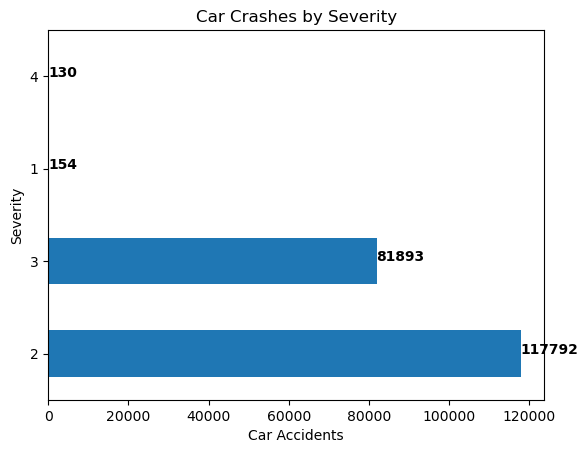

In [109]:
#5. Severity and Types of Accidents:
#What types or severity of accidents were most common?

import matplotlib.pyplot as plt

severity_counts = car_crash_df['Severity'].value_counts()

ax = severity_counts.plot(kind='barh')

for i, v in enumerate(severity_counts):
    ax.text(v + 10, i, str(v), color='black', fontweight='bold')


plt.xlabel('Car Accidents')
plt.ylabel('Severity')
plt.title('Car Crashes by Severity')

plt.show()


In [110]:
car_crash_df['Severity'].value_counts() 

Severity
2    117792
3     81893
1       154
4       130
Name: count, dtype: int64

In [111]:
#to do
#1 group by location using knn, population, weather patterns
#Question 3 ANSWER: have car accidented decreased over time?,
#Question 4 ANSWER: #get unemployment data, median household income
#6 look at years as a whole, pick certaint counties/states/zip codes to look at indivudlalyl and highlight the changes 

Text(0.5, 1.0, 'Car Crashes by State')

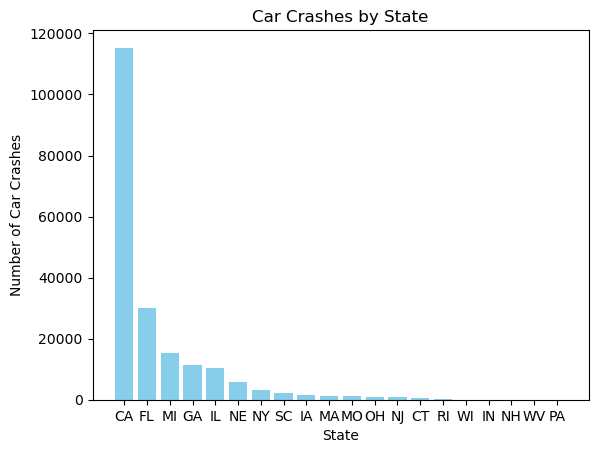

In [112]:
state_counts = car_crash_df['State'].value_counts()
plt.bar(state_counts.index, state_counts.values, color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Car Crashes')
plt.title('Car Crashes by State')


In [113]:
# state_counts = car_crash_df['State'].value_counts().reset_index()
# state_counts.columns = ['State', 'Number of Car Crashes']
# fig = px.bar(state_counts, x='State', y='Number of Car Crashes', title='Car Crashes by State',
#              labels={'Number of Car Crashes': 'Number of Car Crashes'})
# fig.show()

In [114]:
# import pandas as pd
# import plotly.express as px

# filtered_df = car_crash_df[car_crash_df['Severity'].isin([3, 4])]
# state_counts = filtered_df['State'].value_counts().reset_index(name='Number of Car Crashes')
# fig = px.bar(state_counts, x='State', y='Number of Car Crashes',
#              title='Car Crashes by State for Severity 3 and 4',
#              labels={'State': 'State', 'Number of Car Crashes': 'Number of Car Crashes'})
# fig.show()


In [115]:
# Deep dive into California heat map, showing concentration of accidents within the State
# california_df = car_crash_df[car_crash_df['State'] == 'CA']
# px.set_mapbox_access_token('your_mapbox_token')
# heat_map_concentration = px.density_mapbox(california_df,
#                               lat='Start_Lat',
#                               lon='Start_Lng', # or we can do quanitity of crashes within that area or zip code
#                               radius=10, 
#                               zoom=6, 
#                               mapbox_style='open-street-map',
#                               title='Interactive Heat Map of Car Accidents in California',
#                               hover_name='City',
#                               hover_data=["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)"])

# # Show the heat map
# heat_map_concentration.show()



In [116]:
california_df = car_crash_df[car_crash_df['State'] == 'CA'].copy()
california_df['Crashes_In_Zip'] = california_df.groupby('Zipcode')['Zipcode'].transform('count')
california_df[['Zipcode', 'Crashes_In_Zip']]

Zipcode  Crashes_In_Zip
728      94591           197.0
729      94544           257.0
730      94595            30.0
731      95014           202.0
732      95118            89.0
...        ...             ...
116040   92780           373.0
116041   92808           256.0
116042   90640           162.0
116043   90606           437.0
116044   92374           244.0

[115317 rows x 2 columns]

In [117]:
#How do i show number of car crashes per capita of population.
# Can we add a column called population which shows the current population of each state?

population_df["Resident Population in California"]


0    39149.186
1    39337.785
2    39437.463
3    39437.610
4    39501.653
5    39142.991
6    39029.342
Name: Resident Population in California, dtype: float64

In [241]:
## we can use this to create a chart showing accidents per month by year to see the impacts during covid 

crash_date_df = car_crash_df
startend = crash_date_df[['Severity','Start_Time', 'End_Time', 'Weather_Condition']]
startend['Start_Time'] = pd.to_datetime(startend['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
startend['newtime'] = startend['Start_Time'].dt.to_period('M').astype(str)
startend

/var/folders/cy/73kdnnm16jgbwcrs70z1yyl80000gn/T/ipykernel_3549/1952829184.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cy/73kdnnm16jgbwcrs70z1yyl80000gn/T/ipykernel_3549/1952829184.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Severity          Start_Time             End_Time Weather_Condition  \
0              3 2016-02-08 05:46:00  2016-02-08 11:00:00        Light Rain   
1              2 2016-02-08 06:07:59  2016-02-08 06:37:59        Light Rain   
2              2 2016-02-08 06:49:27  2016-02-08 07:19:27          Overcast   
3              3 2016-02-08 07:23:34  2016-02-08 07:53:34     Mostly Cloudy   
4              2 2016-02-08 07:39:07  2016-02-08 08:09:07     Mostly Cloudy   
...          ...                 ...                  ...               ...   
199964         2 2017-01-12 06:12:42  2017-01-12 06:56:35          Overcast   
199965         3 2017-01-12 06:15:23  2017-01-12 06:45:04          Overcast   
199966         2 2017-01-12 06:12:02  2017-01-12 06:41:39          Overcast   
199967         2 2017-01-12 06:09:29  2017-01-12 06:39:11     Partly Cloudy   
199968         2 2017-01-12 06:08:14  2017-01-12 06:38:05          Overcast   

        newtime  
0       2016-02  
1       2016-02  
2       2016-02  
3       2016-02  
4       2016-02  
...         ...  
199964  2017-01  
199965  2017-01  
199966  2017-01  
199967  2017-01  
199968  2017-01  

[199969 rows x 5 columns]

In [242]:
##this creates seperate colums for year and month
startend['year'] = startend['Start_Time'].dt.year
startend['month'] = startend['Start_Time'].dt.month
startend.head(4)

/var/folders/cy/73kdnnm16jgbwcrs70z1yyl80000gn/T/ipykernel_3549/3072269863.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cy/73kdnnm16jgbwcrs70z1yyl80000gn/T/ipykernel_3549/3072269863.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Severity          Start_Time             End_Time Weather_Condition  \
0         3 2016-02-08 05:46:00  2016-02-08 11:00:00        Light Rain   
1         2 2016-02-08 06:07:59  2016-02-08 06:37:59        Light Rain   
2         2 2016-02-08 06:49:27  2016-02-08 07:19:27          Overcast   
3         3 2016-02-08 07:23:34  2016-02-08 07:53:34     Mostly Cloudy   

   newtime  year  month  
0  2016-02  2016      2  
1  2016-02  2016      2  
2  2016-02  2016      2  
3  2016-02  2016      2

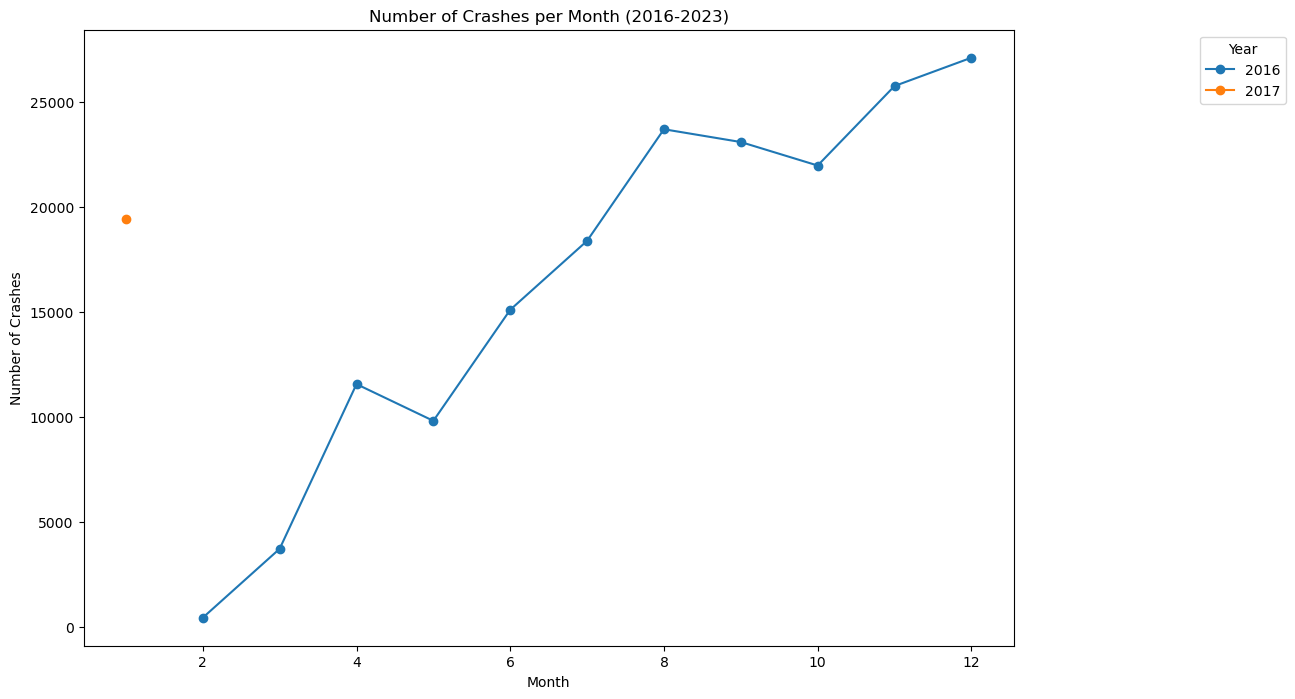

In [243]:
crashes_per_month = startend.groupby(['year', 'month']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))

for year in crashes_per_month['year'].unique():
    data_year = crashes_per_month[crashes_per_month['year'] == year]
    plt.plot(data_year['month'], data_year['count'], label=str(year), marker='o', linestyle='-')

plt.title('Number of Crashes per Month (2016-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

#this version of code makes it interactive
# fig = px.line(crashes_per_month, x='month', y='count', color='year', markers=True,
#                labels={'count': 'Number of Crashes', 'month': 'Month', 'year': 'Year'},
#                title='Number of Crashes per Month (2016-2023)')

# fig.show()


In [244]:
def map_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

startend['season'] = startend['month'].apply(map_to_season)
startend.tail()

/var/folders/cy/73kdnnm16jgbwcrs70z1yyl80000gn/T/ipykernel_3549/2085907798.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Severity          Start_Time             End_Time Weather_Condition  \
199964         2 2017-01-12 06:12:42  2017-01-12 06:56:35          Overcast   
199965         3 2017-01-12 06:15:23  2017-01-12 06:45:04          Overcast   
199966         2 2017-01-12 06:12:02  2017-01-12 06:41:39          Overcast   
199967         2 2017-01-12 06:09:29  2017-01-12 06:39:11     Partly Cloudy   
199968         2 2017-01-12 06:08:14  2017-01-12 06:38:05          Overcast   

        newtime  year  month  season  
199964  2017-01  2017      1  Winter  
199965  2017-01  2017      1  Winter  
199966  2017-01  2017      1  Winter  
199967  2017-01  2017      1  Winter  
199968  2017-01  2017      1  Winter

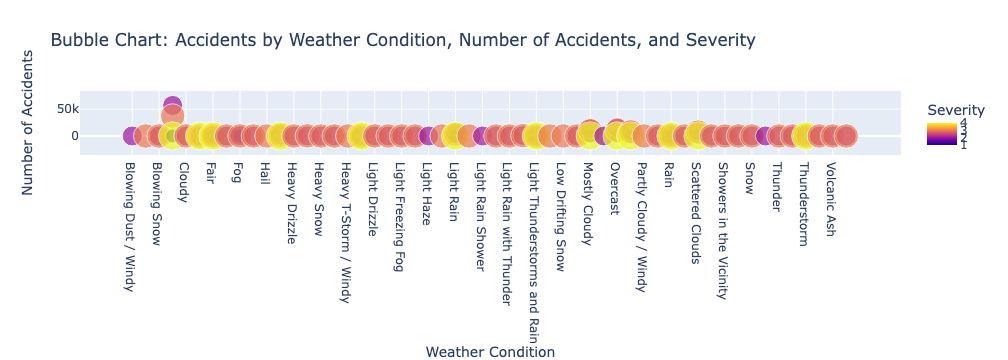

In [258]:
# Assuming 'startend' is your DataFrame
weather_severity_totals = startend.groupby(['Weather_Condition', 'Severity']).size().reset_index(name='Total Accidents')

fig = px.scatter(weather_severity_totals, x='Weather_Condition', y='Total Accidents',
                 size='Severity',  # Set marker size based on Severity
                 color='Severity',
                 labels={'Weather_Condition': 'Weather Condition', 'Total Accidents': 'Number of Accidents'},
                 title='Bubble Chart: Accidents by Weather Condition, Number of Accidents, and Severity')

fig.show()

In [122]:
severity_by_season = startend.groupby('season')['Severity'].mean()
severity_by_season

season
Fall      2.401011
Spring    2.426405
Summer    2.415304
Winter    2.408589
Name: Severity, dtype: float64

In [123]:
#did they improve or get worse over time
#highlight specific months 

In [124]:
#thoughts

#use Knn imputation for data >1, average for data <1
#explore metadata, maybe drop columns too help with run time
#graphs showing car accidents overtime
#clean sunrise_sunset column


In [125]:
#to do
#1  population, weather patterns
#Question 3 ANSWER: have car accidents decreased over time?,
#Question 4 ANSWER: #get unemployment data, median household income
#6 look at years as a whole, pick certaint counties/states/zip codes to look at indivudlalyl and highlight the changes 

# 4. Socioeconomic and Demographic Factors:
Do various areas with low socioeconomic status and income affect car accidents in any way? (correlation between the amount or severity of accidents and income/demographics) FRED API - did unemployment have a positive or negative correlation with car accidents?

In [126]:
#calculating correlation between unemployment and car crashes

# merged_df = pd.merge(c_unem_df, car_crash_df, on='Year-Month', how='inner')
# merged_df

In [127]:
#Did unemployment have a positive or negative correlation with car accidents?
merged_df.columns

NameError: name 'merged_df' is not defined

In [128]:
#merged_df = pd.merge(unemployment_df, car_crash_df, on='date', how='inner')

In [129]:
#Do various areas with low socioeconomic status and income affect car accidents in any way? (correlation between the amount or severity of accidents and income/demographics)

## Car Crash's and SNAP Socioeconomic analysis

In [130]:
# Uniformly fill resident population data for each month for the given years data
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2022-01-01')

monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
population_df.set_index('Date', inplace=True)
expanded_df = population_df.reindex(monthly_dates)
expanded_df.ffill(inplace=True)


#making date column for expanded_df
expanded_df.reset_index(inplace=True)
expanded_df.rename(columns={'index':'Date'}, inplace=True)


In [131]:
#since FRED API measures Population in thousands, we need to multiply by 1000 to get the actual population

expanded_df.loc[:, expanded_df.columns != 'Date'] *= 1000
expanded_df.loc[:, expanded_df.columns != 'Date'] = expanded_df.loc[:, expanded_df.columns != 'Date'].round(0).astype(int)


In [132]:
#Droping columns not needed for analysis in both df's
expanded_df.drop(columns=['Resident Population in Federal Reserve District 1: Boston','Resident Population in Federal Reserve District 9: Minneapolis'], inplace=True)
snap_df.drop("SNAP Benefits Recipients in District of Columbia",axis=1, inplace=True)
expanded_df.drop("Resident Population in the District of Columbia", axis=1, inplace=True)

In [133]:
snap_df.shape

(78, 51)

In [134]:
#merging snap data with population data
snap_with_pop=pd.merge(snap_df, expanded_df, on='Date', how='inner')
snap_with_pop.tail(3)
#snap_with_pop['California SNAP Beneifts Per 100,000'] = (snap_with_pop['SNAP Benefits Recipients in California'] / snap_with_pop['Resident Population in California']) * 100000

# snap_with_pop.str.contains('California')
#normalizing snap data




Date  SNAP Benefits Recipients in North Carolina  \
70 2021-11-01                                   1700709.0   
71 2021-12-01                                   1720044.0   
72 2022-01-01                                   1732124.0   

    SNAP Benefits Recipients in Massachusetts  \
70                                   988831.0   
71                                   996444.0   
72                                  1009432.0   

    SNAP Benefits Recipients in Washington  \
70                                841721.0   
71                                841737.0   
72                                848620.0   

    SNAP Benefits Recipients in Missouri  \
70                              661436.0   
71                              656356.0   
72                              641804.0   

    SNAP Benefits Recipients in Minnesota  \
70                               430741.0   
71                               423724.0   
72                               428739.0   

    SNAP Benefits Recipients in Arizona  SNAP Benefits Recipients in Oregon  \
70                             770978.0                            644999.0   
71                             781094.0                            652384.0   
72                             781330.0                            704121.0   

    SNAP Benefits Recipients in Florida  \
70                            2974930.0   
71                            2903034.0   
72                            2791040.0   

    SNAP Benefits Recipients in California  ...  \
70                               4528129.0  ...   
71                               4465861.0  ...   
72                               4470515.0  ...   

    Resident Population in West Virginia  Resident Population in Delaware  \
70                             1785526.0                        1004807.0   
71                             1785526.0                        1004807.0   
72                             1775156.0                        1018396.0   

    Resident Population in Kansas  Resident Population in New Hampshire  \
70                      2937922.0                             1387505.0   
71                      2937922.0                             1387505.0   
72                      2937150.0                             1395231.0   

    Resident Population in Iowa  Resident Population in New Mexico  \
70                    3197689.0                          2116677.0   
71                    3197689.0                          2116677.0   
72                    3200517.0                          2113344.0   

    Resident Population in Montana  Resident Population in Nebraska  \
70                       1106227.0                        1963554.0   
71                       1106227.0                        1963554.0   
72                       1122867.0                        1967923.0   

    Resident Population in Maine  Resident Population in North Dakota  
70                     1377238.0                             777934.0  
71                     1377238.0                             777934.0  
72                     1385340.0                             779261.0  

[3 rows x 101 columns]

In [135]:
state_lst = expanded_df.columns.str.split(' ')
state_lst = state_lst[1:] #removing Date from my state_lst

state_lst = [state[3] if len(state) < 4 else state[3:5] for state in state_lst] #extracting state name for 4 columns

state_lst

[['California'],
 ['Florida'],
 ['Texas'],
 ['New', 'York'],
 ['Alabama'],
 ['Georgia'],
 ['Ohio'],
 ['Washington'],
 ['Missouri'],
 ['North', 'Carolina'],
 ['Tennessee'],
 ['Michigan'],
 ['Colorado'],
 ['Arizona'],
 ['Indiana'],
 ['Illinois'],
 ['Oregon'],
 ['Connecticut'],
 ['Louisiana'],
 ['Utah'],
 ['Pennsylvania'],
 ['Nevada'],
 ['Massachusetts'],
 ['South', 'Carolina'],
 ['Wisconsin'],
 ['Hawaii'],
 ['New', 'Jersey'],
 ['Alaska'],
 ['Wyoming'],
 ['Idaho'],
 ['Minnesota'],
 ['Kentucky'],
 ['Mississippi'],
 ['Maryland'],
 ['Arkansas'],
 ['Virginia'],
 ['Oklahoma'],
 ['Vermont'],
 ['South', 'Dakota'],
 ['Rhode', 'Island'],
 ['West', 'Virginia'],
 ['Delaware'],
 ['Kansas'],
 ['New', 'Hampshire'],
 ['Iowa'],
 ['New', 'Mexico'],
 ['Montana'],
 ['Nebraska'],
 ['Maine'],
 ['North', 'Dakota']]

In [136]:
#joining together 2 word states in one string 
state_lst = [' '.join(state) if type(state) == list else state for state in state_lst]
state_lst #out state_lst is complete

['California',
 'Florida',
 'Texas',
 'New York',
 'Alabama',
 'Georgia',
 'Ohio',
 'Washington',
 'Missouri',
 'North Carolina',
 'Tennessee',
 'Michigan',
 'Colorado',
 'Arizona',
 'Indiana',
 'Illinois',
 'Oregon',
 'Connecticut',
 'Louisiana',
 'Utah',
 'Pennsylvania',
 'Nevada',
 'Massachusetts',
 'South Carolina',
 'Wisconsin',
 'Hawaii',
 'New Jersey',
 'Alaska',
 'Wyoming',
 'Idaho',
 'Minnesota',
 'Kentucky',
 'Mississippi',
 'Maryland',
 'Arkansas',
 'Virginia',
 'Oklahoma',
 'Vermont',
 'South Dakota',
 'Rhode Island',
 'West Virginia',
 'Delaware',
 'Kansas',
 'New Hampshire',
 'Iowa',
 'New Mexico',
 'Montana',
 'Nebraska',
 'Maine',
 'North Dakota']

In [137]:
# Create an empty dictionary to store the results
snap_benefits_per_capita = {}

# Loop through each state
for state in state_lst:
    
    # Divide one column by the other
    result = snap_with_pop['SNAP Benefits Recipients in ' + state] / snap_with_pop['Resident Population in ' + state] 
    
    # Store the result in the dictionary
    snap_benefits_per_capita[state] = result


snap_benefits_per_capita

{'California': 0     0.111994
 1     0.111221
 2     0.111830
 3     0.110340
 4     0.109900
         ...   
 68    0.112332
 69    0.114665
 70    0.115682
 71    0.114091
 72    0.114542
 Length: 73, dtype: float64,
 'Florida': 0     0.177632
 1     0.172595
 2     0.172590
 3     0.158036
 4     0.156391
         ...   
 68    0.143202
 69    0.139441
 70    0.136289
 71    0.132995
 72    0.125469
 Length: 73, dtype: float64,
 'Texas': 0     0.133771
 1     0.133488
 2     0.133132
 3     0.132685
 4     0.134894
         ...   
 68    0.106393
 69    0.114428
 70    0.117820
 71    0.119498
 72    0.119875
 Length: 73, dtype: float64,
 'New York': 0     0.151506
 1     0.151352
 2     0.151393
 3     0.150840
 4     0.151004
         ...   
 68    0.139810
 69    0.139396
 70    0.139920
 71    0.140121
 72    0.142736
 Length: 73, dtype: float64,
 'Alabama': 0     0.178758
 1     0.178268
 2     0.177661
 3     0.170315
 4     0.169641
         ...   
 68    0.151243
 69    0.15

In [138]:
snap_benefits_per_capita_df = pd.DataFrame(snap_benefits_per_capita)



In [139]:
#rounding to nearest whole number
snap_benefits_per_capita_df = (snap_benefits_per_capita_df * 100000).round()


In [140]:
snap_benefits_per_capita_df

California  Florida    Texas  New York  Alabama  Georgia     Ohio  \
0      11199.0  17763.0  13377.0   15151.0  17876.0  16937.0  13983.0   
1      11122.0  17260.0  13349.0   15135.0  17827.0  16830.0  13996.0   
2      11183.0  17259.0  13313.0   15139.0  17766.0  16678.0  13988.0   
3      11034.0  15804.0  13268.0   15084.0  17032.0  16462.0  13832.0   
4      10990.0  15639.0  13489.0   15100.0  16964.0  16418.0  13761.0   
..         ...      ...      ...       ...      ...      ...      ...   
68     11233.0  14320.0  10639.0   13981.0  15124.0  14341.0  12671.0   
69     11466.0  13944.0  11443.0   13940.0  15126.0  14723.0  12710.0   
70     11568.0  13629.0  11782.0   13992.0  15145.0  14867.0  12642.0   
71     11409.0  13300.0  11950.0   14012.0  15114.0  15062.0  12675.0   
72     11454.0  12547.0  11987.0   14274.0  14851.0  14701.0  12635.0   

    Washington  Missouri  North Carolina  ...  West Virginia  Delaware  \
0      14203.0   13760.0         15803.0  ...        19504.0   15422.0   
1      14193.0   13666.0         15769.0  ...        19589.0   15365.0   
2      14099.0   13627.0         15734.0  ...        19567.0   15425.0   
3      13888.0   13018.0         15459.0  ...        19589.0   15350.0   
4      13747.0   12869.0         15418.0  ...        19407.0   15372.0   
..         ...       ...             ...  ...            ...       ...   
68     10931.0   11079.0         15634.0  ...        16825.0   10904.0   
69     11094.0   10953.0         15906.0  ...        16748.0   11363.0   
70     10874.0   10721.0         16096.0  ...        17094.0   11627.0   
71     10874.0   10638.0         16279.0  ...        16989.0   11862.0   
72     10900.0   10389.0         16190.0  ...        17149.0   11726.0   

    Kansas  New Hampshire     Iowa  New Mexico  Montana  Nebraska    Maine  \
0   8851.0         7440.0  12206.0     22142.0  11007.0    9252.0  14306.0   
1   8786.0         7401.0  12184.0     22294.0  11130.0    9204.0  14380.0   
2   8692.0         7404.0  12181.0     22454.0  11226.0    9203.0  14321.0   
3   8637.0         7327.0  12157.0     22560.0  11247.0    9149.0  14260.0   
4   8580.0         7262.0  12089.0     22638.0  11304.0    9129.0  14318.0   
..     ...            ...      ...         ...      ...       ...      ...   
68  6705.0         4967.0   8690.0     25768.0   8232.0    7871.0  11433.0   
69  6712.0         4958.0   8729.0     26015.0   8130.0    7947.0  11861.0   
70  6656.0         4963.0   8755.0     26261.0   8115.0    7935.0  11470.0   
71  6658.0         4963.0   8842.0     26495.0   8091.0    7946.0  11562.0   
72  6700.0         4930.0   8829.0     26764.0   7950.0    7916.0  11447.0   

    North Dakota  
0         7158.0  
1         7194.0  
2         7211.0  
3         7228.0  
4         7213.0  
..           ...  
68        6315.0  
69        6270.0  
70        6270.0  
71        6251.0  
72        6162.0  

[73 rows x 50 columns]

In [141]:
#finding the 10 lowest and 10 highest states for snap benefits per capita
top_10_highest_snap=snap_benefits_per_capita_df.mean().round().sort_values(ascending=False).head(10)
top_10_highest_snap

New Mexico       22638.0
Louisiana        18472.0
West Virginia    17691.0
Mississippi      16091.0
Oregon           15780.0
Alabama          15587.0
Oklahoma         15180.0
Georgia          14974.0
Florida          14724.0
Illinois         14616.0
dtype: float64

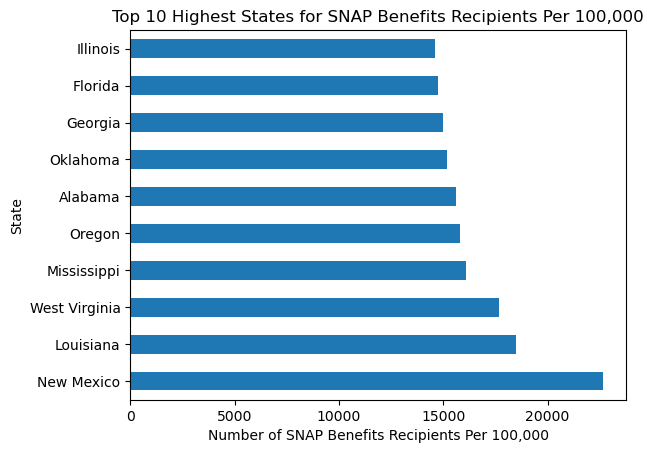

In [142]:
top_10_highest_snap.plot(kind='barh', title='Top 10 Highest States for SNAP Benefits Recipients Per 100,000', xlabel='Number of SNAP Benefits Recipients Per 100,000', ylabel='State')
plt.show()

In [143]:
top_10_lowest_snap=snap_benefits_per_capita_df.mean().round().sort_values(ascending=True).head(10)
top_10_lowest_snap

Wyoming          5104.0
Utah             5746.0
New Hampshire    5956.0
North Dakota     6665.0
Kansas           7366.0
Minnesota        7766.0
Colorado         8317.0
Nebraska         8537.0
Idaho            8660.0
New Jersey       8686.0
dtype: float64

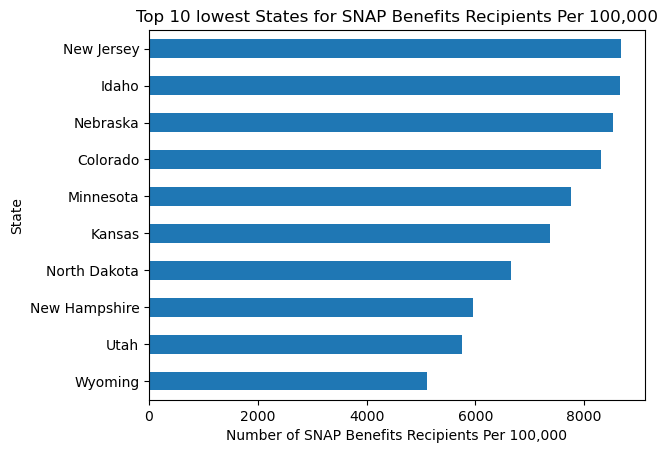

In [144]:
top_10_lowest_snap.plot(kind='barh', title='Top 10 lowest States for SNAP Benefits Recipients Per 100,000', xlabel='Number of SNAP Benefits Recipients Per 100,000', ylabel='State')
plt.show()

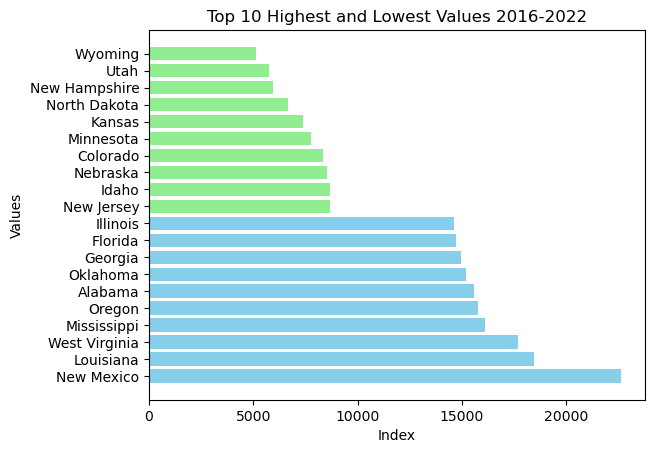

In [145]:
import matplotlib.pyplot as plt



# Combine the two DataFrames
combined_df = pd.concat([top_10_highest_snap, top_10_lowest_snap]).sort_values(ascending=False)

# Plot the bar graph
colors = ['skyblue'] * len(top_10_highest_snap) + ['lightgreen'] * len(top_10_lowest_snap)
plt.barh(combined_df.index, combined_df.values, color=colors)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Top 10 Highest and Lowest Values 2016-2022')
plt.show()



In [146]:
#grouping car crash data by state and month and then then based on snap data see if there is a difference
grouping_car_crash_data=car_crash_df.groupby(['State','Year-Month']).size().reset_index(name='Number of Car Crashes')

In [147]:
grouped_car_crash_data =grouping_car_crash_data.pivot(index='Year-Month', columns='State', values='Number of Car Crashes')
grouped_car_crash_data


State            CA     CT      FL      GA     IA      IL   IN     MA      MI  \
Year-Month                                                                      
2016-02         NaN    NaN     NaN     NaN    NaN     NaN  NaN    NaN     NaN   
2016-03      3264.0    NaN     NaN     NaN    9.0     NaN  NaN    NaN     NaN   
2016-04     11013.0    NaN     NaN     NaN   49.0     NaN  NaN    NaN     NaN   
2016-05      9185.0    NaN     NaN     NaN   66.0     NaN  NaN    NaN     NaN   
2016-06     11306.0    NaN  1296.0   571.0   76.0   440.0  3.0    NaN   562.0   
2016-07     10096.0    NaN  3520.0  1218.0   66.0  1175.0  3.0    NaN  1475.0   
2016-08     12899.0    NaN  4488.0  1486.0   82.0  1549.0  6.0    NaN  2020.0   
2016-09     12165.0    NaN  4176.0  1697.0  167.0  1501.0  6.0    NaN  2200.0   
2016-10     11546.0    NaN  3740.0  1718.0  220.0  1424.0  2.0    NaN  2198.0   
2016-11     13563.0    2.0  4900.0  1805.0  254.0  1738.0  NaN   16.0  2306.0   
2016-12     10942.0  347.0  4615.0  1729.0  268.0  1508.0  3.0  809.0  2844.0   
2017-01      9338.0  119.0  3458.0  1272.0  164.0  1049.0  4.0  356.0  1725.0   

State          MO     NE    NH     NJ      NY     OH   PA     RI     SC    WI  \
Year-Month                                                                      
2016-02       NaN    NaN   NaN    NaN     NaN  423.0  NaN    NaN    NaN   NaN   
2016-03       NaN  132.0   NaN    NaN     NaN  303.0  NaN    NaN    NaN   NaN   
2016-04       NaN  490.0   NaN    NaN     NaN    NaN  NaN    NaN    NaN   NaN   
2016-05       NaN  552.0   NaN    NaN     NaN    NaN  NaN    NaN    NaN   NaN   
2016-06      47.0  659.0   NaN    NaN     NaN    2.0  NaN    NaN  131.0   NaN   
2016-07     124.0  475.0   NaN    NaN     NaN    2.0  NaN    NaN  215.0   8.0   
2016-08     186.0  701.0   NaN    NaN     NaN    3.0  NaN    NaN  270.0   3.0   
2016-09     169.0  664.0   NaN    NaN     NaN    3.0  NaN    NaN  334.0   2.0   
2016-10     142.0  660.0   NaN    NaN     NaN    2.0  NaN    NaN  311.0   2.0   
2016-11     168.0  579.0   NaN    9.0    34.0    5.0  NaN    9.0  360.0   4.0   
2016-12     130.0  520.0  18.0  541.0  2347.0    3.0  1.0  142.0  320.0  13.0   
2017-01     152.0  466.0   9.0  203.0   733.0    8.0  NaN   55.0  302.0   4.0   

State        WV  
Year-Month       
2016-02     2.0  
2016-03     NaN  
2016-04     NaN  
2016-05     NaN  
2016-06     NaN  
2016-07     NaN  
2016-08     NaN  
2016-09     NaN  
2016-10     NaN  
2016-11     NaN  
2016-12     NaN  
2017-01     NaN

In [148]:
#trimming data to only include 2016-2022
grouped_car_crash_data = grouped_car_crash_data.loc['2016-01':'2022-01']
grouped_car_crash_data

State            CA     CT      FL      GA     IA      IL   IN     MA      MI  \
Year-Month                                                                      
2016-02         NaN    NaN     NaN     NaN    NaN     NaN  NaN    NaN     NaN   
2016-03      3264.0    NaN     NaN     NaN    9.0     NaN  NaN    NaN     NaN   
2016-04     11013.0    NaN     NaN     NaN   49.0     NaN  NaN    NaN     NaN   
2016-05      9185.0    NaN     NaN     NaN   66.0     NaN  NaN    NaN     NaN   
2016-06     11306.0    NaN  1296.0   571.0   76.0   440.0  3.0    NaN   562.0   
2016-07     10096.0    NaN  3520.0  1218.0   66.0  1175.0  3.0    NaN  1475.0   
2016-08     12899.0    NaN  4488.0  1486.0   82.0  1549.0  6.0    NaN  2020.0   
2016-09     12165.0    NaN  4176.0  1697.0  167.0  1501.0  6.0    NaN  2200.0   
2016-10     11546.0    NaN  3740.0  1718.0  220.0  1424.0  2.0    NaN  2198.0   
2016-11     13563.0    2.0  4900.0  1805.0  254.0  1738.0  NaN   16.0  2306.0   
2016-12     10942.0  347.0  4615.0  1729.0  268.0  1508.0  3.0  809.0  2844.0   
2017-01      9338.0  119.0  3458.0  1272.0  164.0  1049.0  4.0  356.0  1725.0   

State          MO     NE    NH     NJ      NY     OH   PA     RI     SC    WI  \
Year-Month                                                                      
2016-02       NaN    NaN   NaN    NaN     NaN  423.0  NaN    NaN    NaN   NaN   
2016-03       NaN  132.0   NaN    NaN     NaN  303.0  NaN    NaN    NaN   NaN   
2016-04       NaN  490.0   NaN    NaN     NaN    NaN  NaN    NaN    NaN   NaN   
2016-05       NaN  552.0   NaN    NaN     NaN    NaN  NaN    NaN    NaN   NaN   
2016-06      47.0  659.0   NaN    NaN     NaN    2.0  NaN    NaN  131.0   NaN   
2016-07     124.0  475.0   NaN    NaN     NaN    2.0  NaN    NaN  215.0   8.0   
2016-08     186.0  701.0   NaN    NaN     NaN    3.0  NaN    NaN  270.0   3.0   
2016-09     169.0  664.0   NaN    NaN     NaN    3.0  NaN    NaN  334.0   2.0   
2016-10     142.0  660.0   NaN    NaN     NaN    2.0  NaN    NaN  311.0   2.0   
2016-11     168.0  579.0   NaN    9.0    34.0    5.0  NaN    9.0  360.0   4.0   
2016-12     130.0  520.0  18.0  541.0  2347.0    3.0  1.0  142.0  320.0  13.0   
2017-01     152.0  466.0   9.0  203.0   733.0    8.0  NaN   55.0  302.0   4.0   

State        WV  
Year-Month       
2016-02     2.0  
2016-03     NaN  
2016-04     NaN  
2016-05     NaN  
2016-06     NaN  
2016-07     NaN  
2016-08     NaN  
2016-09     NaN  
2016-10     NaN  
2016-11     NaN  
2016-12     NaN  
2017-01     NaN

In [149]:
#dealing with missing values by filling them with the average of the column
grouped_car_crash_data.fillna(grouped_car_crash_data.mean(), inplace=True)
grouped_car_crash_data

State                 CA     CT        FL      GA          IA      IL  \
Year-Month                                                              
2016-02     10483.363636  156.0  3774.125  1437.0  129.181818  1298.0   
2016-03      3264.000000  156.0  3774.125  1437.0    9.000000  1298.0   
2016-04     11013.000000  156.0  3774.125  1437.0   49.000000  1298.0   
2016-05      9185.000000  156.0  3774.125  1437.0   66.000000  1298.0   
2016-06     11306.000000  156.0  1296.000   571.0   76.000000   440.0   
2016-07     10096.000000  156.0  3520.000  1218.0   66.000000  1175.0   
2016-08     12899.000000  156.0  4488.000  1486.0   82.000000  1549.0   
2016-09     12165.000000  156.0  4176.000  1697.0  167.000000  1501.0   
2016-10     11546.000000  156.0  3740.000  1718.0  220.000000  1424.0   
2016-11     13563.000000    2.0  4900.000  1805.0  254.000000  1738.0   
2016-12     10942.000000  347.0  4615.000  1729.0  268.000000  1508.0   
2017-01      9338.000000  119.0  3458.000  1272.0  164.000000  1049.0   

State             IN          MA       MI      MO          NE    NH     NJ  \
Year-Month                                                                   
2016-02     3.857143  393.666667  1916.25  139.75  536.181818  13.5  251.0   
2016-03     3.857143  393.666667  1916.25  139.75  132.000000  13.5  251.0   
2016-04     3.857143  393.666667  1916.25  139.75  490.000000  13.5  251.0   
2016-05     3.857143  393.666667  1916.25  139.75  552.000000  13.5  251.0   
2016-06     3.000000  393.666667   562.00   47.00  659.000000  13.5  251.0   
2016-07     3.000000  393.666667  1475.00  124.00  475.000000  13.5  251.0   
2016-08     6.000000  393.666667  2020.00  186.00  701.000000  13.5  251.0   
2016-09     6.000000  393.666667  2200.00  169.00  664.000000  13.5  251.0   
2016-10     2.000000  393.666667  2198.00  142.00  660.000000  13.5  251.0   
2016-11     3.857143   16.000000  2306.00  168.00  579.000000  13.5    9.0   
2016-12     3.000000  809.000000  2844.00  130.00  520.000000  18.0  541.0   
2017-01     4.000000  356.000000  1725.00  152.00  466.000000   9.0  203.0   

State           NY     OH   PA          RI       SC         WI   WV  
Year-Month                                                           
2016-02     1038.0  423.0  1.0   68.666667  280.375   5.142857  2.0  
2016-03     1038.0  303.0  1.0   68.666667  280.375   5.142857  2.0  
2016-04     1038.0   75.4  1.0   68.666667  280.375   5.142857  2.0  
2016-05     1038.0   75.4  1.0   68.666667  280.375   5.142857  2.0  
2016-06     1038.0    2.0  1.0   68.666667  131.000   5.142857  2.0  
2016-07     1038.0    2.0  1.0   68.666667  215.000   8.000000  2.0  
2016-08     1038.0    3.0  1.0   68.666667  270.000   3.000000  2.0  
2016-09     1038.0    3.0  1.0   68.666667  334.000   2.000000  2.0  
2016-10     1038.0    2.0  1.0   68.666667  311.000   2.000000  2.0  
2016-11       34.0    5.0  1.0    9.000000  360.000   4.000000  2.0  
2016-12     2347.0    3.0  1.0  142.000000  320.000  13.000000  2.0  
2017-01      733.0    8.0  1.0   55.000000  302.000   4.000000  2.0

In [150]:
grouped_car_crash_data.columns#=new_state_lst

Index(['CA', 'CT', 'FL', 'GA', 'IA', 'IL', 'IN', 'MA', 'MI', 'MO', 'NE', 'NH',
       'NJ', 'NY', 'OH', 'PA', 'RI', 'SC', 'WI', 'WV'],
      dtype='object', name='State')

In [151]:
#combined df has the states we need to extract from grouped_car_crash_data
combined_df = pd.DataFrame(combined_df)

combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index':'State'}, inplace=True)


In [152]:
#understanding what states I need
states_for_analysis=combined_df['State']
states_for_analysis

0        New Mexico
1         Louisiana
2     West Virginia
3       Mississippi
4            Oregon
5           Alabama
6          Oklahoma
7           Georgia
8           Florida
9          Illinois
10       New Jersey
11            Idaho
12         Nebraska
13         Colorado
14        Minnesota
15           Kansas
16     North Dakota
17    New Hampshire
18             Utah
19          Wyoming
Name: State, dtype: object

In [153]:
#with the help of an AI friend, I was able to get the states I needed for my analysis

states_for_analysis = {
    "NM": "New Mexico",
    "LA": "Louisiana",
    "WV": "West Virginia",
    "MS": "Mississippi",
    "OR": "Oregon",
    "AL": "Alabama",
    "OK": "Oklahoma",
    "GA": "Georgia",
    "FL": "Florida",
    "IL": "Illinois",
    "NJ": "New Jersey",
    "ID": "Idaho",
    "NE": "Nebraska",
    "CO": "Colorado",
    "MN": "Minnesota",
    "KS": "Kansas",
    "ND": "North Dakota",
    "NH": "New Hampshire",
    "UT": "Utah",
    "WY": "Wyoming"
}

In [154]:
grouped_car_crash_data = grouped_car_crash_data[states_for_analysis.keys()]

KeyError: "['NM', 'LA', 'MS', 'OR', 'AL', 'OK', 'ID', 'CO', 'MN', 'KS', 'ND', 'UT', 'WY'] not in index"

In [155]:
grouped_car_crash_data.rename(columns=states_for_analysis, inplace=True)


In [156]:
grouped_car_crash_data.to_csv('grouped_car_crash_data.csv')

In [157]:
grouped_car_crash_df=pd.read_csv('grouped_car_crash_data.csv')

In [158]:
#repeating this for population data
population_subset_analysis = expanded_df[states_for_analysis.keys()]

KeyError: "None of [Index(['NM', 'LA', 'WV', 'MS', 'OR', 'AL', 'OK', 'GA', 'FL', 'IL', 'NJ', 'ID',\n       'NE', 'CO', 'MN', 'KS', 'ND', 'NH', 'UT', 'WY'],\n      dtype='object')] are in the [columns]"

In [159]:
#two samplemm t -test between california and connecticut car accidents
#word cloud of most common words in description


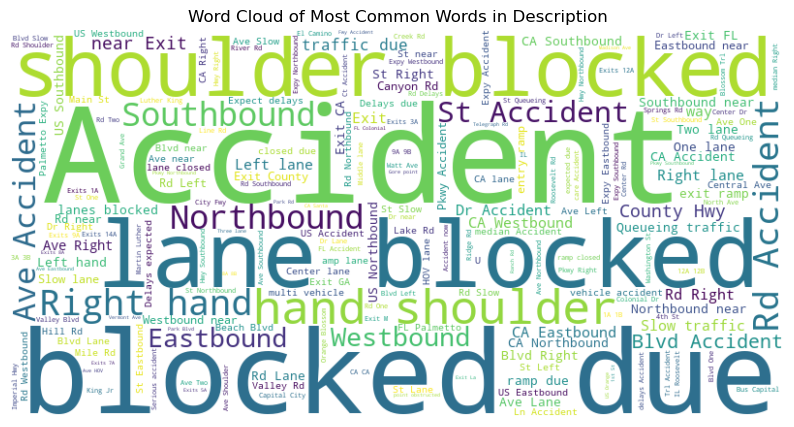

In [160]:
#wordcloud of most common words in description
# pd.set_option('display.max_colwidth', None) #helping me visualize the description column
#fix word cloud becuase it buggs with lots of data

car_crash_df['Description']

# Concatenate all the descriptions into a single string
text = ' '.join(car_crash_df['Description'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Description')
plt.show()


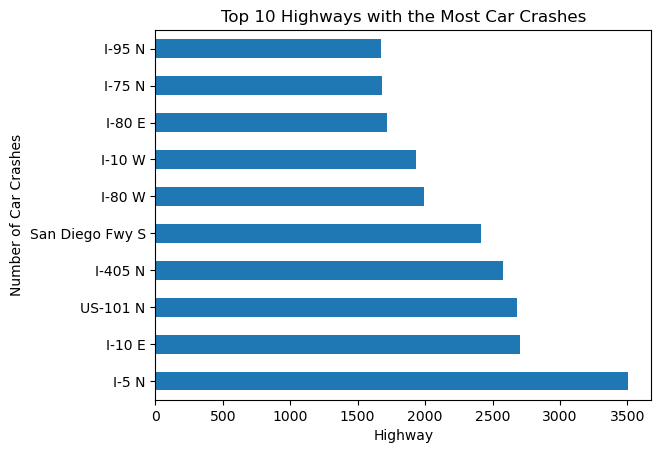

In [161]:
car_crash_df['Street'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Highway')
plt.ylabel('Number of Car Crashes')
plt.title("Top 10 Highways with the Most Car Crashes")
plt.show()


# Speed Bumps
![Speed Bump Picture, Credits: https://www.speedbumpsandhumps.com/?utm_source=bing&utm_medium=cpc&utm_campaign=SBH-Brand&utm_term=%20speed%20%20bumps%20%20&%20%20speed%20%20humps&mkwid=y9DUirWV&pcrid=&plc=&pkw=%20speed%20%20bumps%20%20&%20%20speed%20%20humps&pmt=&cvosrc=ppc.bing.%20speed%20%20bumps%20%20&%20%20speed%20%20humps&utm_adgroup=BMM&st-t=sbhbingbrnd&msclkid=c4825a6262df1a1e6dd23f1f5dc69a30&utm_content=BMM](https://media.istockphoto.com/photos/speed-bump-picture-id538561431?k=6&m=538561431&s=612x612&w=0&h=1zKikb-BnoU_m7oCVPp60WooGgVj3D5Xv3BLkq9C7bY=)
### We all hate them, but do they help reduce car accidents?


In [162]:
print('Car accidents that occurred with and without nearby speed bumps')
raw_bump_data = car_crash_df["Bump"].value_counts()
total_accidents = len(car_crash_df)
bump_percentages = raw_bump_data / total_accidents * 100

print("(Speed Bump):", raw_bump_data.iloc[1], f"({bump_percentages.iloc[1]:.2f})%")
print("(No Speed Bump):", raw_bump_data.iloc[0], f"({bump_percentages.iloc[0]:.2f})%")


Car accidents that occurred with and without nearby speed bumps
(Speed Bump): 57 (0.03)%
(No Speed Bump): 199912 (99.97)%


In [163]:
#further investigation into speed bumps and car accidents
car_crashes_with_bumps = car_crash_df[car_crash_df["Bump"] == True]

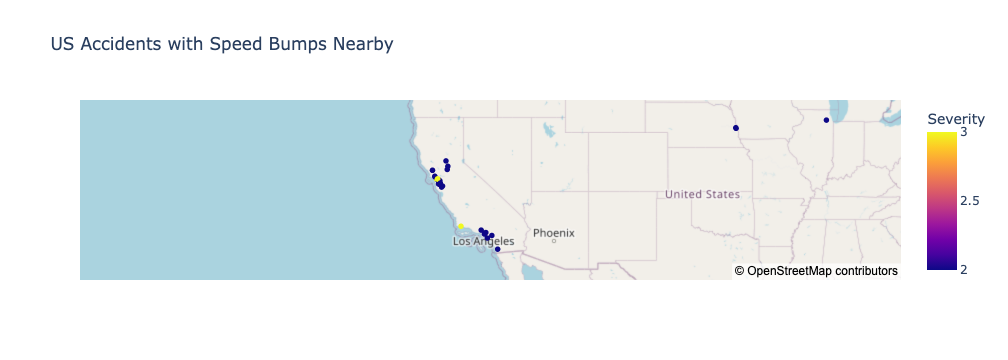

In [164]:
#plotting interactive map of car crashes with speed bumps
interactive_graph=px.scatter_mapbox(car_crashes_with_bumps,
                    lat="Start_Lat",
                    lon="Start_Lng",
                    color="Severity",
                    zoom=3,
                    hover_name="City",
                    hover_data=["State","Temperature(F)","Visibility(mi)"],
                    title="US Accidents with Speed Bumps Nearby")
interactive_graph.update_layout(mapbox_style="open-street-map")
interactive_graph.show()

In [165]:
car_crashes_with_bumps["Severity"].value_counts()

Severity
2    37
3    20
Name: count, dtype: int64

In [166]:
# t-test of if severity of car accidents severity is affected by speed bumps

In [167]:
#graphing car crashes with speed bumps by weather patterns

In [168]:
car_crashes_with_bumps["Weather_Condition"].value_counts()

Weather_Condition
Clear               31
Mostly Cloudy       10
Overcast             7
Partly Cloudy        5
Scattered Clouds     3
Light Rain           1
Name: count, dtype: int64

In [169]:
#more analysis on car crashes with speed bumps with weather patterns 

In [ ]:
6. Regional Improvements: Which areas have improved the most since 2016 at decreasing the rate of car accidents?

In [226]:
car_crash_df.head()

Severity           Start_Time             End_Time  Start_Lat  Start_Lng  \
0         3  2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147 -84.058723   
1         2  2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059 -82.831184   
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148 -84.032608   
3         3  2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753 -84.205582   
4         2  2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781 -84.188354   

   Distance(mi)                                        Description  \
0          0.01  Right lane blocked due to accident on I-70 Eas...   
1          0.01  Accident on Brice Rd at Tussing Rd. Expect del...   
2          0.01  Accident on OH-32 State Route 32 Westbound at ...   
3          0.01  Accident on I-75 Southbound at Exits 52 52B US...   
4          0.01  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      Street          City      County  ... Visibility(mi)  \
0                     I-70 E        Dayton  Montgomery  ...           10.0   
1                   Brice Rd  Reynoldsburg    Franklin  ...           10.0   
2             State Route 32  Williamsburg    Clermont  ...           10.0   
3                     I-75 S        Dayton  Montgomery  ...            9.0   
4  Miamisburg Centerville Rd        Dayton  Montgomery  ...            6.0   

  Wind_Direction Wind_Speed(mph)  Weather_Condition   Bump  Crossing  \
0           Calm             NaN         Light Rain  False     False   
1           Calm             NaN         Light Rain  False     False   
2             SW             3.5           Overcast  False     False   
3             SW             4.6      Mostly Cloudy  False     False   
4             SW             3.5      Mostly Cloudy  False     False   

   Roundabout Traffic_Signal  Sunrise_Sunset Year-Month  
0       False          False           Night    2016-02  
1       False          False           Night    2016-02  
2       False           True           Night    2016-02  
3       False          False           Night    2016-02  
4       False           True             Day    2016-02  

[5 rows x 26 columns]

In [193]:
stateswithregions = car_crash_df[['Severity', 'State', 'Year-Month']].copy()
stateswithregions

Severity State Year-Month
0              3    OH    2016-02
1              2    OH    2016-02
2              2    OH    2016-02
3              3    OH    2016-02
4              2    OH    2016-02
...          ...   ...        ...
199964         2    NJ    2017-01
199965         3    NY    2017-01
199966         2    NY    2017-01
199967         2    NY    2017-01
199968         2    MA    2017-01

[199969 rows x 3 columns]

In [196]:
## mapping states to regions based on US census region map

region_to_states_mapping = {
    'West': ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
    'South': ['AL', 'AR', 'DC', 'DE', 'MD', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'WV'],
    'Northeast': ['CT', 'MA', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
}

# Create a reverse mapping from state to region
state_to_region_mapping = {state: region for region, states in region_to_states_mapping.items() for state in states}

stateswithregions['Region'] = stateswithregions['State'].map(state_to_region_mapping)

In [197]:
stateswithregions

Severity State Year-Month     Region
0              3    OH    2016-02    Midwest
1              2    OH    2016-02    Midwest
2              2    OH    2016-02    Midwest
3              3    OH    2016-02    Midwest
4              2    OH    2016-02    Midwest
...          ...   ...        ...        ...
199964         2    NJ    2017-01  Northeast
199965         3    NY    2017-01  Northeast
199966         2    NY    2017-01  Northeast
199967         2    NY    2017-01  Northeast
199968         2    MA    2017-01  Northeast

[199969 rows x 4 columns]

In [204]:
## put year and month into their own columns
stateswithregions['Year'] = stateswithregions['Year-Month'].dt.year
stateswithregions['Month'] = stateswithregions['Year-Month'].dt.month
stateswithregions

Severity State Year-Month     Region  Year  Month
0              3    OH    2016-02    Midwest  2016      2
1              2    OH    2016-02    Midwest  2016      2
2              2    OH    2016-02    Midwest  2016      2
3              3    OH    2016-02    Midwest  2016      2
4              2    OH    2016-02    Midwest  2016      2
...          ...   ...        ...        ...   ...    ...
199964         2    NJ    2017-01  Northeast  2017      1
199965         3    NY    2017-01  Northeast  2017      1
199966         2    NY    2017-01  Northeast  2017      1
199967         2    NY    2017-01  Northeast  2017      1
199968         2    MA    2017-01  Northeast  2017      1

[199969 rows x 6 columns]

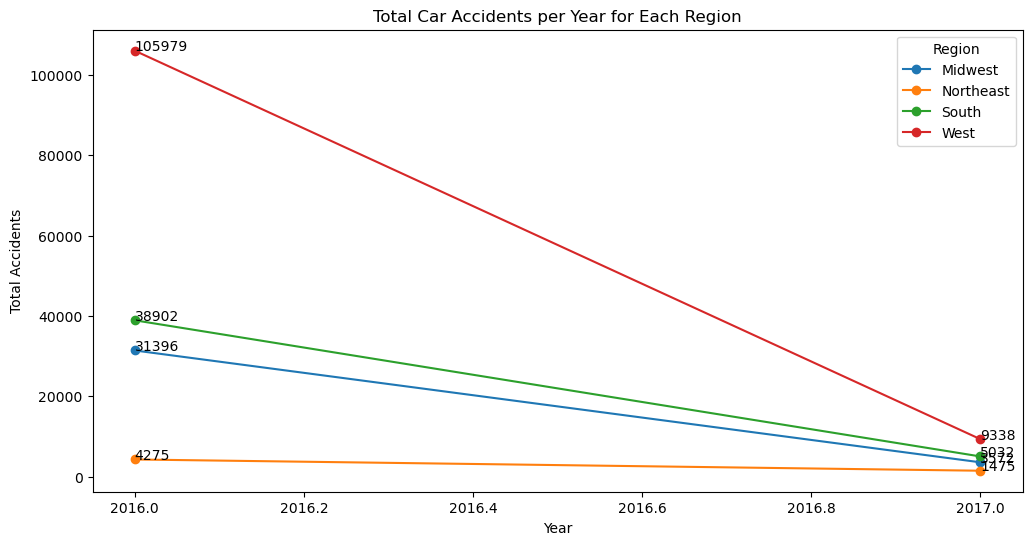

In [232]:
# Assuming 'stateswithregions' is your DataFrame
region_year_totals = stateswithregions.groupby(['Region', 'Year']).size().reset_index(name='Total Accidents')

plt.figure(figsize=(12, 6))

# Plot lines for each region
for region in region_year_totals['Region'].unique():
    region_data = region_year_totals[region_year_totals['Region'] == region]
    plt.plot(region_data['Year'], region_data['Total Accidents'], marker='o', label=region)

    # # Annotate each point with its value
    for i, txt in enumerate(region_data['Total Accidents']):
        plt.annotate(txt, (region_data['Year'].iloc[i], region_data['Total Accidents'].iloc[i]))

plt.title('Total Car Accidents per Year for Each Region')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.legend(title='Region')
plt.show()

# Dataset Citation

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.